In [2]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
%matplotlib inline


In [3]:
df=pd.read_excel(r'C:\Users\Marija\Documents\Zavrsni ra\Podaci\Portfolio-2019.xlsx')
df

,ADPL,ADRS2,ARNT,ATGR,ATPL,ERNT,HT,KOEI,PODR,RIVP
0,191.0,495.0,370.0,1300.0,375.0,1400.0,175.0,635.0,484.0,39.0
1,191.0,504.0,374.0,1300.0,368.0,1400.0,173.5,650.0,483.0,38.5
2,191.0,504.0,378.0,1300.0,381.0,1400.0,173.0,650.0,479.0,38.4
3,186.0,497.0,368.0,1300.0,385.0,1400.0,172.5,650.0,471.0,38.1
4,191.0,498.0,368.0,1300.0,381.0,1405.0,172.5,635.0,471.0,38.2
...,...,...,...,...,...,...,...,...,...,...
242,172.5,417.0,NaN,NaN,NaN,NaN,149.5,NaN,373.0,34.4
243,173.0,NaN,NaN,NaN,NaN,NaN,148.0,NaN,NaN,34.4
244,NaN,NaN,NaN,NaN,NaN,NaN,147.5,NaN,NaN,34.6
245,NaN,NaN,NaN,NaN,NaN,NaN,148.5,NaN,NaN,35.0


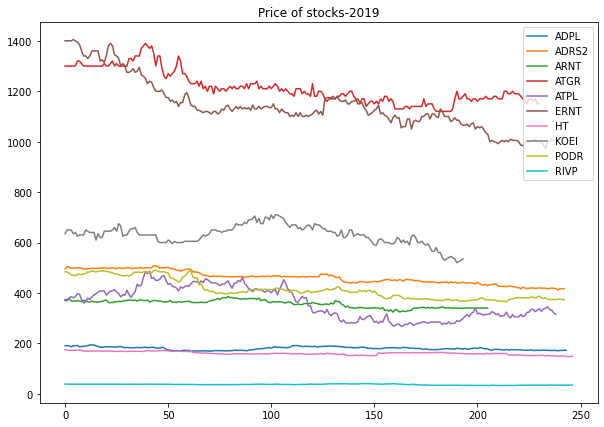

In [66]:
for i, col in enumerate(df.columns):
    df[col].plot(figsize=(10,7))

plt.title('Price of stocks-2019')

plt.xlabel(xlabel=None)
plt.legend(df.columns)

#Saving the graph into a JPG file
plt.savefig('stockprices19.png', bbox_inches='tight')

In [17]:
returns=df.pct_change()

In [18]:
returns

,ADPL,ADRS2,ARNT,ATGR,ATPL,ERNT,HT,KOEI,PODR,RIVP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.018182,0.010811,0.0,-0.018667,0.000000,-0.008571,0.023622,-0.002066,-0.012821
2,0.000000,0.000000,0.010695,0.0,0.035326,0.000000,-0.002882,0.000000,-0.008282,-0.002597
3,-0.026178,-0.013889,-0.026455,0.0,0.010499,0.000000,-0.002890,0.000000,-0.016701,-0.007812
4,0.026882,0.002012,0.000000,0.0,-0.010390,0.003571,0.000000,-0.023077,0.000000,0.002625
...,...,...,...,...,...,...,...,...,...,...
242,0.002907,0.000000,0.000000,0.0,0.000000,0.000000,-0.009934,0.000000,-0.002674,-0.005780
243,0.002899,0.000000,0.000000,0.0,0.000000,0.000000,-0.010033,0.000000,0.000000,0.000000
244,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.003378,0.000000,0.000000,0.005814
245,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006780,0.000000,0.000000,0.011561


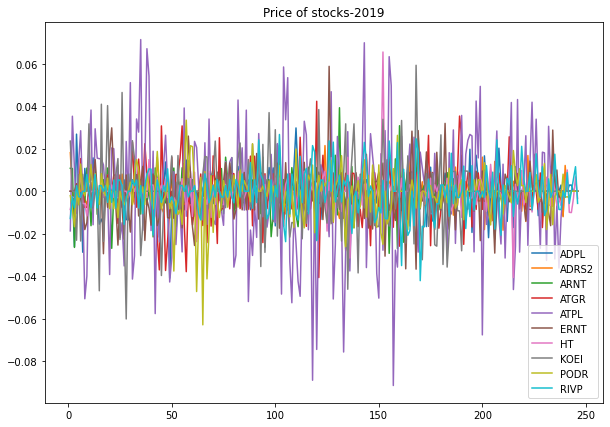

In [67]:
for i, col in enumerate(df.columns):
    returns[col].plot(figsize=(10,7))
plt.title('Price of stocks-2019')
plt.xlabel(xlabel=None)
plt.legend(df.columns)

plt.savefig('stockreturns19.png', bbox_inches='tight')
#mora bit bolji nacin za plotat ovo da je preglednije (ili da plotam za svaku dionicu posebnp, kao skup grafova??)

In [57]:
numstocks=10
weights=np.repeat(0.1,numstocks)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [59]:
weighted_returns = (weights * returns)
print(weighted_returns.head())

       ADPL     ADRS2      ARNT  ATGR      ATPL      ERNT        HT      KOEI  \
0       NaN       NaN       NaN   NaN       NaN       NaN       NaN       NaN   
1  0.000000  0.001818  0.001081   0.0 -0.001867  0.000000 -0.000857  0.002362   
2  0.000000  0.000000  0.001070   0.0  0.003533  0.000000 -0.000288  0.000000   
3 -0.002618 -0.001389 -0.002646   0.0  0.001050  0.000000 -0.000289  0.000000   
4  0.002688  0.000201  0.000000   0.0 -0.001039  0.000357  0.000000 -0.002308   

       PODR      RIVP  
0       NaN       NaN  
1 -0.000207 -0.001282  
2 -0.000828 -0.000260  
3 -0.001670 -0.000781  
4  0.000000  0.000262  


0      0.000000
1      0.001049
2      0.003226
3     -0.008343
4      0.000162
         ...   
242   -0.001548
243   -0.000713
244    0.000244
245    0.001834
246   -0.000908
Length: 247, dtype: float64


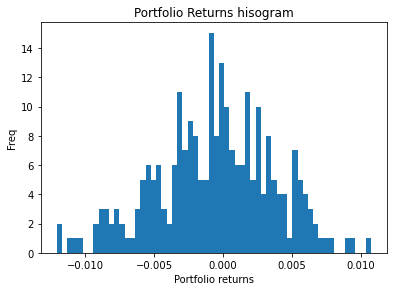

<Figure size 432x288 with 0 Axes>

In [68]:
portfolio_return = weighted_returns.sum(axis=1)
print(portfolio_return)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(portfolio_return, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns hisogram")
plt.show(); 
plt.savefig('Portfolio returns-19.png', bbox_inches='tight')

In [51]:
volatility = returns.std()#sta cu s tobom???
volatility.head()


ADPL     0.008803
ADRS2    0.006320
ARNT     0.008753
ATGR     0.011846
ATPL     0.027727
dtype: float64

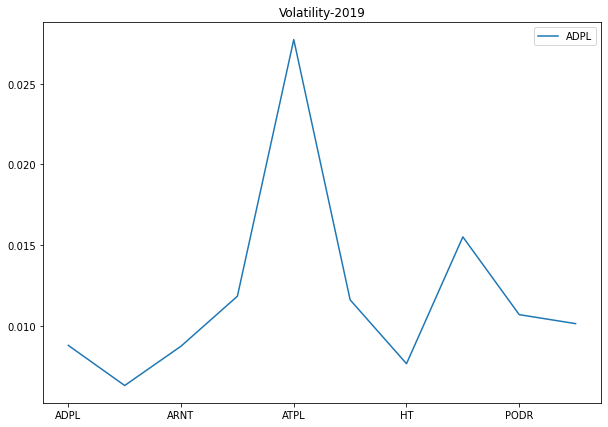

In [69]:
volatility.plot(figsize=(10,7))
plt.title('Volatility-2019')

plt.xlabel(xlabel=None)
plt.legend(df.columns)
#problem
plt.savefig('volatility19.png', bbox_inches='tight')